In [0]:
import numpy as np
import networkx as nx

In [0]:
G=nx.Graph()

In [0]:
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_weighted_edges_from([(1,2,5), (2, 3, 3), (3, 4, 2), (4, 5, 8), (5, 1, 5), (2, 4, 2)])

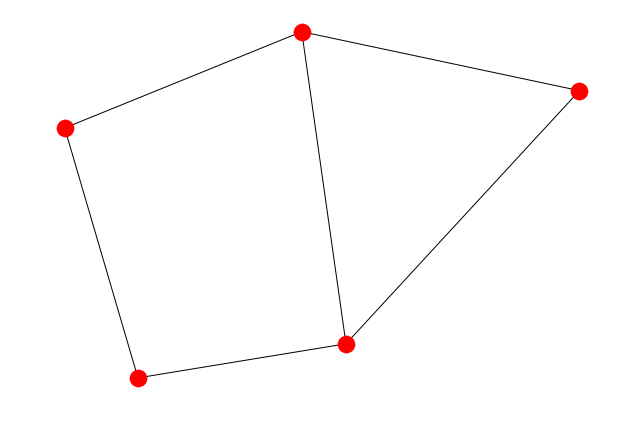

In [4]:
nx.draw(G)

Process Data from the input file

In [0]:
file = ...
kingdoms = ..
starting_kingdom = .. 
adjacency_matrix = ...


Greedy Heuristic Algorithm:

In [0]:
  nodes = np.arange(0, len(G))
  nodes_str = ''.join([str(x) for x in nodes])

In [0]:
#@title Greedy approach 1


In [0]:
from networkx.algorithms.approximation import *

In [37]:
import networkx
networkx.__version__

'2.1'

In [0]:
# def get_shortest_path():
#   G = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
#   return(nx.dijkstra_path(G, 0, 1))

In [0]:
#Helper Function:

def get_neighbors(adjacency_matrix, node_index):
  """Func to return indices of the neighbors.. parameters are adjacency matrix and node index."""
  row_dictionary = adjacency_matrix[node_index]
  neighbor_indices = []
  for i in range(len(row_dictionary) - 1):
    if (row_dictionary[i] > 0) & (i!=node_index): #check i != node_index because there will be a nonzero element representing the conquering cost.
      neighbor_indices = neighbor_indices + [i]
  return neighbor_indices 



In [0]:
#Helper Function:

def get_travel_cost(adjacency_matrix, path_indices):
  """Get the cost to take a given path, ignore the conquer costs... just count the edge costs."""
  total_cost = 0
  #pairwise iteration through path
  for i in range(len(path_indices) - 1):
    pair_cost = adjacency_matrix[i][i+1]
    total_cost = total_cost + pair_cost
  return total_cost

In [0]:
import numpy as np
def get_shortest_path(G, source, dest):
  source = str(source)
  dest = str(dest)
  nodes = np.arange(0, len(G))
  nodes = ''.join([str(x) for x in nodes])
  p=[[source]]
  flag=0

  while p:                          # evaluates to true if p not empty
      x = p.pop(0)
      j = nodes.index(x[-1])        # use [-1] to get last element
      if nodes[j] == dest:             # by moving this check out of the loop...
          break                     # ...you can use break and don't need flag
      for i, e in enumerate(nodes): # enumerate gives (index, element)
          if graph[j][i] and e not in x: # a bit more concise
              p.append(x + [e]) 
  return [int(elem) for elem in x]

graph=  [#a,b,c,d,e,f,g,h,i,j
     [0,1,1,1,1,0,0,0,0,0],  #a
     [1,0,0,1,0,0,1,0,0,0],  #b
     [1,0,0,1,0,0,0,0,0,0],  #c
     [1,1,1,0,0,0,0,1,0,0],  #d
     [1,0,0,0,0,1,0,1,1,0],  #e
     [0,0,0,0,1,0,0,1,1,0],  #f
     [0,1,0,0,0,0,0,1,1,1],  #g
     [0,0,0,1,1,1,1,0,1,0],  #h
     [0,0,0,0,1,1,1,1,0,1],  #i
     [0,0,0,0,0,0,1,0,1,0],  #j
    ]

In [0]:
def solve(list_of_kingdom_names, starting_kingdom, adjacency_matrix, params=[]):
    """
    Write your algorithm here.
    Input:
        list_of_kingdom_names: An list of kingdom names such that node i of the graph corresponds to name index i in the list
        starting_kingdom: The name of the starting kingdom for the walk
        adjacency_matrix: The adjacency matrix from the input file

    Output:
        Return 2 things. The first is a list of kingdoms representing the walk, and the second is the set of kingdoms that are conquered
    """
    
    index_to_name_map = {i:x for i,x in enumerate(list_of_kingdom_names)}
    name_to_index_map = {x:i for i,x in enumerate(list_of_kingdom_names)}
    conquered_nodes = np.array([]) #names
    surrendered_nodes = set() #names
    closed_walk = np.array([name_to_index_map[starting_kingdom]]) #initially filled with index values
    current_node = starting_kingdom

    #Keep iterating until we conquer and surrender everything.
    while (len(conquered_nodes) + len(surrendered_nodes))< len(list_of_kingdom_names):
      
      not_conquered_names = np.setdiff1d(list_of_kingdom_names, conquered_nodes) 
      #print(not_conquered_names)
      heuristic_values = {}
      
      #Calculate heuristic values for unconquered nodes
      for node in not_conquered_names:
        node_neighbor_indicies = get_neighbors(adjacency_matrix, name_to_index_map[node]) # DONE
        unvisited_node_neighbors = np.intersect1d(np.setdiff1d(node_neighbor_indicies, conquered_nodes), np.setdiff1d(node_neighbor_indicies, conquered_nodes))#Calculates neighbors that have not been surrendered/conquered
        conquering_neighbors_gain = sum([adjacency_matrix[i][i] for i in unvisited_node_neighbors])
        shortest_path = get_shortest_path(adjacency_matrix, str(name_to_index_map[current_node]), str(name_to_index_map[node])) #TODO SUE shortest path.. dont worry about conquer costs.
        travel_cost = get_travel_cost(adjacency_matrix, shortest_path) #DONE
        conquer_cost = adjacency_matrix[name_to_index_map[node]][name_to_index_map[node]] 
        node_heuristic = conquering_neighbors_gain/(travel_cost + conquer_cost)
        heuristic_values[node] = node_heuristic
      
      #Based on heurstics, find conquer the node with largest gain
      node_to_conquer = max(heuristic_values, key=heuristic_values.get) #name of node to conquer
      surrendered_nodes.update(get_neighbors(adjacency_matrix, name_to_index_map[node_to_conquer]))
      conquered_nodes = np.append(conquered_nodes, node_to_conquer)
      shortest_path = get_shortest_path(adjacency_matrix, name_to_index_map[current_node], name_to_index_map[node_to_conquer])
      closed_walk = np.append(closed_walk, shortest_path[1:]) #add the nodes along the path to the walk. careful to not repeat vertices
      current_node = node_to_conquer
    
    #Once all nodes conquered or surrendered, take the shortest path back
    shortest_path_back = get_shortest_path(adjacency_matrix, name_to_index_map[current_node], name_to_index_map[starting_kingdom])
    closed_walk = np.append(closed_walk, shortest_path_back[1:])
    closed_walk = np.array([index_to_name_map[i] for i in closed_walk]) #convert walk into names
    print(closed_walk)
    return list(closed_walk), conquered_nodes



Testing the function

In [77]:
#Small Example:
list_of_kingdom_names = ["A", "B", "C", "D"]
starting_kingdom = "A"
adjacency_matrix = [[1, 4, 3, -1], 
                     [4, 1, 5, 13], 
                     [3, 5, 1, 12], 
                     [-1, 13, 12, 1]]
solve(list_of_kingdom_names, starting_kingdom, adjacency_matrix, params=[])

['A' 'C' 'A']


(['A', 'C', 'A'], array(['A', 'C'], dtype='|S32'))

In [79]:
#Input 1:
list_of_kingdom_names = ["A", "B", "C", "D", "E", "F", "G"]
starting_kingdom = "A"
adjacency_matrix = [[1.0, 4.0, 3.0, -1, 1, 1.0, 2],
[4.0, 1.0, 5.0, 4, 3.0, 4.0, 5.0],
[3.0, 5.0, 1.0, 5, 4.0, 4, 2.0],
[-1, 4, 5, 1.0, 2.0, 2, 3],
[1, 3.0, 4.0, 2.0, 5, 1.0, 2],
[1.0, 4.0, 4, 2, 1.0, 8.0, 3.0],
[2, 5.0, 2.0, 3, 2, 3.0, 2.0]]
solve(list_of_kingdom_names, starting_kingdom, adjacency_matrix, params=[])

['A' 'C' 'A']


(['A', 'C', 'A'], array(['A', 'C'], dtype='|S32'))

In [0]:
import numpy as np

N = 12
b = np.random.random_integers(-15,15,size=(N,N))
b_symm = (b + b.T)/2
b_symm

In [0]:
list_of_kingdom_names1 = ["A", "B", "C", "D", "E", "F", "G"]
starting_kingdom1 = "A"
adjacency_matrix1 = [[1, 4, 3, -1, 2, 1, 2], 
                     [4, 1, 5, 13, 4, 3, 4], 
                     [3, 5, 1, 12, 3, 4, 7], 
                     [-1, 13, 12, 1, 2, 10, 1],
                     [2, 3, 4, 2, -1, 12, 3],
                     [1, 4, 5, 8, 1, 8, 3],
                     [9, 5, 2, 9, 1, 3, 2]]



10
A B C D E F G H I J
A
1.0 4.0 3.0 x 1 1.0 2 3 4 3
4.0 1.0 5.0 4 3.0 4.0 5.0 6 5 9
3.0 5.0 1.0 5 4.0 4 2.0 4 9 4
x 4 5 1.0 2.0 2 3 2 10 8
1 3.0 4.0 2.0 5 1.0 2 8 1 2
1.0 4.0 4 2 1.0 8.0 3.0 4 2 1
2 5.0 2.0 3 2 3.0 2.0 6 4 5
3 6 4 3 8 4 6 9 8 8
4 5 9 10 1 2 4 8 5 4
3 9 4 8 2 1 5 8 4 7



In [0]:
list_of_kingdom_names = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L"]
starting_kingdom = "A"
# sample adjacency matrix, TODO write a function that takes in num nodes to generate an adjacency matrix 
adjacency_matrix = [[1, 4, 3, -1, 2, 3, 5, 6, 8, 11, 2, 12], 
                    [4, 1, 5, 13, 3, 4, 6, 8, 9, 10, 3, 10], 
                    [3, 5, 1, 12, 1, 3, 4, 7, 6, 9, 18, 2], 
                    [-1, 13, 12, 1, 3, 4, 5, 7, 8, 9, 10, 11],
                    [3, 4, 6, 7, -1, 2, 3, 5, 6, 7, 19, 17],
                    [4, 5, 6, 1, 2, 4, 6, 8, 18, 1, 3, 4],
                    [7, 2, 3, 5, 6, 7, -1, 9, 24, 3, 6, 7],
                    [6, 2, 13, 5, 6, 1, 3, 5, 16, 8, 9, 19, 3],
                    [1, 4, 3, -1, 2, 3, 5, 16, 8, 10, 10, 12], 
                    [4, 1, 15, 13, 3, 17, 6, 8, 19, 11, 3, 10], 
                    [3, 5, 10, 12, 1, 3, 4, 7, 6, 9, 18, 2], 
                    [-1, 13, 12, 4, 3, 4, 5, 7, 4, 19, 10, 11],
                    [3, 4, 6, 7, -1, 3, 3, 15, 6, 7, 19, 17],
                    [4, 5, 6, 11, 2, 14, 3, 8, 18, 1, 3, 4],
                    [7, 2, 13, 5, 6, 7, -1, 9, 4, 5, 6, 7],
                    [6, 2, 3, 5, 6, 1, 3, 5, 6, 8, 9, 9, 3]
                    ]
solve(list_of_kingdom_names, starting_kingdom, adjacency_matrix, params=[])